In [ ]:
#%pip install pandas numpy matplotlib seaborn scikit-learn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder


train = pd.read_csv('train_dataset.csv')
test = pd.read_csv('test_dataset.csv')

Class distribution:
 NObeyesdad
Insufficient_Weight    248
Normal_Weight          255
Obesity_Type_I         322
Obesity_Type_II        259
Obesity_Type_III       296
Overweight_Level_I     264
Overweight_Level_II    256
Name: count, dtype: int64


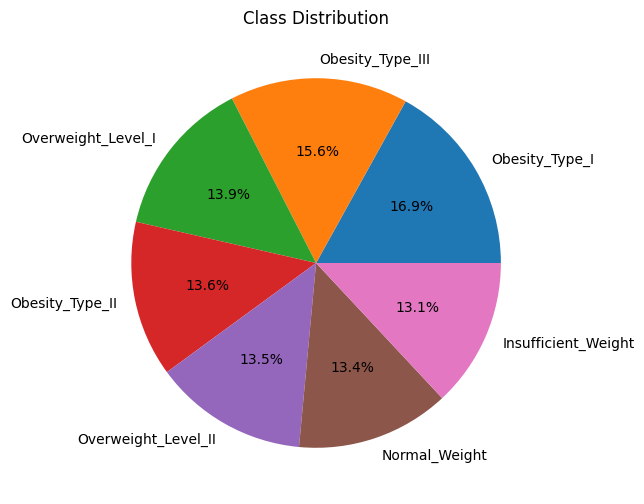

In [ ]:
#Checking if the data is balanced

class_distribution = train['NObeyesdad'].value_counts().sort_index()
print("Class distribution:\n", class_distribution)

train['NObeyesdad'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(6,6))
plt.title('Class Distribution')
plt.ylabel('') 
plt.show()

In [ ]:
# checking for missing values

print("Train missing values:\n", train.isnull().sum())
print("\nTest missing values:\n", test.isnull().sum())

Train missing values:
 Gender                             0
Age                                0
Height                             0
Weight                             0
family_history_with_overweight     0
FAVC                               0
FCVC                              12
NCP                                0
CAEC                               0
SMOKE                              0
CH2O                               0
SCC                                0
FAF                                0
TUE                                0
CALC                              28
MTRANS                             0
NObeyesdad                         0
dtype: int64

Test missing values:
 Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                    

In [ ]:
train.isnull().sum()

Gender                             0
Age                                0
Height                             0
Weight                             0
family_history_with_overweight     0
FAVC                               0
FCVC                              12
NCP                                0
CAEC                               0
SMOKE                              0
CH2O                               0
SCC                                0
FAF                                0
TUE                                0
CALC                              28
MTRANS                             0
NObeyesdad                         0
dtype: int64

In [ ]:
#Handling null values of FCVC
train['FCVC'] = train['FCVC'].fillna(train['FCVC'].median())

In [ ]:
#Handling null values of CALC
train['CALC'] = train['CALC'].fillna(train['CALC'].mode()[0])

In [ ]:
# Rechecking for missing values after imputation:

print("Train missing values:\n", train.isnull().sum())
print("\nTest missing values:\n", test.isnull().sum())

Train missing values:
 Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

Test missing values:
 Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE

In [ ]:
#Getting all numerical values to be normalized before encoding to avoid confusion:
numerical_cols = train.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(numerical_cols)


['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']


In [ ]:
#Getting all categorical values:
categorical_columns = train.select_dtypes(include=['object', 'category']).columns
print(categorical_columns)


Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')


In [ ]:
# Getting the unique values for each categorical column
for col in categorical_columns:
    print(f"\n{col} unique values:")
    print(train[col].unique())



Gender unique values:
['Female' 'Male']

family_history_with_overweight unique values:
['yes' 'no']

FAVC unique values:
['yes' 'no']

CAEC unique values:
['Sometimes' 'Frequently' 'no' 'Always']

SMOKE unique values:
['no' 'yes']

SCC unique values:
['no' 'yes']

CALC unique values:
['Sometimes' 'no' 'Frequently' 'Always']

MTRANS unique values:
['Public_Transportation' 'Automobile' 'Motorbike' 'Walking' 'Bike']

NObeyesdad unique values:
['Obesity_Type_III' 'Overweight_Level_II' 'Obesity_Type_II'
 'Normal_Weight' 'Obesity_Type_I' 'Overweight_Level_I'
 'Insufficient_Weight']


In [ ]:
#Encoding binary nominal categorical columns using Label Encoding
binary_vals = ['family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']
for col in binary_vals:
    train[col] = train[col].map({'yes': 1, 'no': 0})
    test[col] = test[col].map({'yes': 1, 'no': 0})


In [ ]:
#Encoding ordinal categorical columns using Ordinal Encoding:

ordinal_mapping = {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3}
train['CAEC'] = train['CAEC'].map(ordinal_mapping)
train['CALC'] = train['CALC'].map(ordinal_mapping)

test['CAEC'] = test['CAEC'].map(ordinal_mapping)
test['CALC'] = test['CALC'].map(ordinal_mapping)


In [ ]:
#Encoding gender using Label Encoding:
train['Gender'] = train['Gender'].map({'Female': 0, 'Male': 1})
test['Gender'] = test['Gender'].map({'Female': 0, 'Male': 1})


In [ ]:
#Encoding MTRANS (multiclass) nominal categorical columns using One-Hot Encoding:

train = pd.get_dummies(train, columns=['MTRANS'], drop_first=True)
test = pd.get_dummies(test, columns=['MTRANS'], drop_first=True)

In [ ]:
# Encoding the target column using Ordinal Encoding:
ordinal_mapping = {
    'Insufficient_Weight': 0,
    'Normal_Weight': 1,
    'Overweight_Level_I': 2,
    'Overweight_Level_II': 3,
    'Obesity_Type_I': 4,
    'Obesity_Type_II': 5,
    'Obesity_Type_III': 6
}

train['NObeyesdad'] = train['NObeyesdad'].map(ordinal_mapping)
test['NObeyesdad'] = test['NObeyesdad'].map(ordinal_mapping)

In [ ]:
#Getting the outliers in train set to determine which Scalers to use:

from scipy.stats import zscore

z_scores = train[['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']].apply(zscore)
outliers = (abs(z_scores) > 3).sum()
print(outliers)

Age       19
Height     0
Weight     2
FCVC       0
NCP        0
CH2O       0
FAF        0
TUE        0
dtype: int64


In [ ]:
#Making sure that there are no extra outliers in other columns in test set:

from scipy.stats import zscore

z_scores = test[['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']].apply(zscore)
outliers = (abs(z_scores) > 3).sum()
print(outliers)

Age       3
Height    0
Weight    0
FCVC      0
NCP       0
CH2O      0
FAF       0
TUE       0
dtype: int64


In [ ]:
# RobustScaler for 'Age' and 'Weight' (Insensitive to outliers) and StandardScaler (Sensitive to outliers) for other features in train and test sets:
from sklearn.preprocessing import RobustScaler, StandardScaler

robust_cols = ['Age', 'Weight']
standard_cols = ['Height', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

robust_scaler = RobustScaler()
standard_scaler = StandardScaler()

train[robust_cols] = robust_scaler.fit_transform(train[robust_cols])
train[standard_cols] = standard_scaler.fit_transform(train[standard_cols])

test[robust_cols] = robust_scaler.transform(test[robust_cols])
test[standard_cols] = standard_scaler.transform(test[standard_cols])


In [ ]:
 # Filter Method: Includes all numerical features + encoded categoricals
corr_matrix = train.corr()
target_corr = corr_matrix['NObeyesdad'].sort_values(ascending=False)
print(target_corr)



NObeyesdad                        1.000000
Weight                            0.913619
family_history_with_overweight    0.506533
Age                               0.284932
FAVC                              0.245377
FCVC                              0.229546
CALC                              0.151584
CH2O                              0.133193
Height                            0.130464
MTRANS_Public_Transportation      0.073538
NCP                               0.029438
SMOKE                            -0.000776
MTRANS_Bike                      -0.023518
MTRANS_Motorbike                 -0.038523
Gender                           -0.039108
TUE                              -0.102416
MTRANS_Walking                   -0.141862
SCC                              -0.192675
FAF                              -0.200105
CAEC                             -0.335457
Name: NObeyesdad, dtype: float64


In [ ]:
# Wrapper Method using Random Forest model
from sklearn.ensemble import RandomForestClassifier

X = train.drop('NObeyesdad', axis=1)
y = train['NObeyesdad']

# Train model
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

# Get feature importance
importance = pd.Series(rf.feature_importances_, index=X.columns)
importance.sort_values(ascending=False, inplace=True)

# Select top 10  features
top_features = importance.head(10).index.tolist()
print("Top 10 Features (Random Forest):", top_features)

Top 10 Features (Random Forest): ['Weight', 'Height', 'FCVC', 'Age', 'Gender', 'NCP', 'TUE', 'CH2O', 'FAF', 'CAEC']


In [ ]:
columns_to_drop = [
    'SMOKE',
    'CALC',
    'MTRANS_Bike',
    'MTRANS_Motorbike',
    'MTRANS_Public_Transportation',
    'MTRANS_Walking'
]

# Drop columns only if they exist in both datasets
common_cols = [col for col in columns_to_drop if col in train.columns and col in test.columns]

train = train.drop(columns=common_cols)
test = test.drop(columns=common_cols)


In [ ]:
#Adding BMI as a calculated feature:
# Calculate BMI: weight (kg) / (height (m)^2)
train['BMI'] = train['Weight'] / (train['Height'] ** 2)
test['BMI'] = test['Weight'] / (test['Height'] ** 2)



In [ ]:
print("Correlation between BMI and Obesity Level:", train['BMI'].corr(train['NObeyesdad'].astype('category').cat.codes))

Correlation between BMI and Obesity Level: 0.22985569238579767


In [ ]:
from scipy.stats import spearmanr

# Calculate Spearman correlation
spearman_corr, _ = spearmanr(train['BMI'], train['NObeyesdad'])
print("Spearman Correlation (BMI vs. Obesity):", spearman_corr)

Spearman Correlation (BMI vs. Obesity): 0.8369641788356407


In [ ]:
train.columns
test.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'CH2O', 'SCC', 'FAF', 'TUE',
       'NObeyesdad', 'BMI'],
      dtype='object')

# Modelling

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# Separate features and target
X_train = train.drop("NObeyesdad", axis=1)
y_train = train["NObeyesdad"]

X_test = test.drop("NObeyesdad", axis=1)
y_test = test["NObeyesdad"]


# Standardize numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train.columns


Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'CH2O', 'SCC', 'FAF', 'TUE', 'BMI'],
      dtype='object')

In [ ]:
models = {
    "KNN 1": KNeighborsClassifier(n_neighbors=3, weights='uniform'),
    "KNN 2": KNeighborsClassifier(n_neighbors=5, weights='distance'),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(),
    "Random Forest 1": RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42),
    "Random Forest 2": RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)

}

results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='weighted', zero_division=0),
        "Recall": recall_score(y_test, y_pred, average='weighted'),
        "F1 Score": f1_score(y_test, y_pred, average='weighted'),
        "Confusion Matrix": confusion_matrix(y_test, y_pred),
        "Classification Report": classification_report(y_test, y_pred, output_dict=True)
    }


In [ ]:
summary = pd.DataFrame({
    model: {
        "Accuracy": metrics["Accuracy"],
        "Precision": metrics["Precision"],
        "Recall": metrics["Recall"],
        "F1 Score": metrics["F1 Score"]
    }
    for model, metrics in results.items()
}).T

print("Model Comparison:")
print(summary)


Model Comparison:
                     Accuracy  Precision    Recall  F1 Score
KNN 1                0.857820   0.863833  0.857820  0.855293
KNN 2                0.853081   0.861161  0.853081  0.849069
Logistic Regression  0.881517   0.880159  0.881517  0.878793
SVM                  0.919431   0.922306  0.919431  0.918827
Random Forest 1      0.966825   0.971018  0.966825  0.967279
Random Forest 2      0.952607   0.955738  0.952607  0.952661


In [ ]:
from sklearn.metrics import classification_report

print("Random Forest Classification Report:")
print(classification_report(y_test, models["Random Forest 1"].predict(X_test_scaled)))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       0.84      1.00      0.91        32
           2       1.00      0.88      0.94        26
           3       0.97      0.91      0.94        34
           4       1.00      0.97      0.98        29
           5       1.00      1.00      1.00        38
           6       1.00      1.00      1.00        28

    accuracy                           0.97       211
   macro avg       0.97      0.97      0.97       211
weighted avg       0.97      0.97      0.97       211



In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


models = {
    "KNN 1": KNeighborsClassifier(n_neighbors=3, weights='uniform'),
    "KNN 2": KNeighborsClassifier(n_neighbors=5, weights='distance'),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(),
    "Random Forest 1": RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42),
    "Random Forest 2": RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)

}

results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)


    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    results[name] = {
        # Training metrics
        "Training Accuracy": accuracy_score(y_train, y_train_pred),

        # Test metrics
        "Test Accuracy": accuracy_score(y_test, y_test_pred),
        "Precision": precision_score(y_test, y_test_pred, average='weighted', zero_division=0),
        "Recall": recall_score(y_test, y_test_pred, average='weighted'),
        "F1 Score": f1_score(y_test, y_test_pred, average='weighted'),
        "Confusion Matrix": confusion_matrix(y_test, y_test_pred),
        "Classification Report": classification_report(y_test, y_test_pred, output_dict=True)
    }


for name, metrics in results.items():
    print(f"{name} - Training Accuracy: {metrics['Training Accuracy']:.2f} | Test Accuracy: {metrics['Test Accuracy']:.2f}")


KNN 1 - Training Accuracy: 0.90 | Test Accuracy: 0.86
KNN 2 - Training Accuracy: 1.00 | Test Accuracy: 0.85
Logistic Regression - Training Accuracy: 0.90 | Test Accuracy: 0.88
SVM - Training Accuracy: 0.93 | Test Accuracy: 0.92
Random Forest 1 - Training Accuracy: 1.00 | Test Accuracy: 0.97
Random Forest 2 - Training Accuracy: 1.00 | Test Accuracy: 0.95


In [ ]:
best_model = models["Random Forest 1"]

Evaluation for KNN 1:
Accuracy: 0.8578, Precision: 0.8638, Recall: 0.8578, F1 Score: 0.8553
Confusion Matrix:
[[24  0  0  0  0  0  0]
 [ 5 19  5  2  1  0  0]
 [ 1  2 21  0  2  0  0]
 [ 2  0  1 29  2  0  0]
 [ 0  1  2  0 24  2  0]
 [ 0  1  0  0  1 36  0]
 [ 0  0  0  0  0  0 28]]



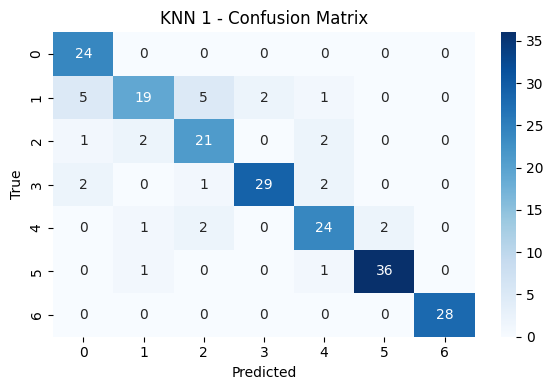

Evaluation for KNN 2:
Accuracy: 0.8531, Precision: 0.8612, Recall: 0.8531, F1 Score: 0.8491
Confusion Matrix:
[[24  0  0  0  0  0  0]
 [ 6 18  4  3  1  0  0]
 [ 0  3 21  0  2  0  0]
 [ 2  0  1 27  4  0  0]
 [ 0  0  1  0 26  2  0]
 [ 0  0  1  0  1 36  0]
 [ 0  0  0  0  0  0 28]]



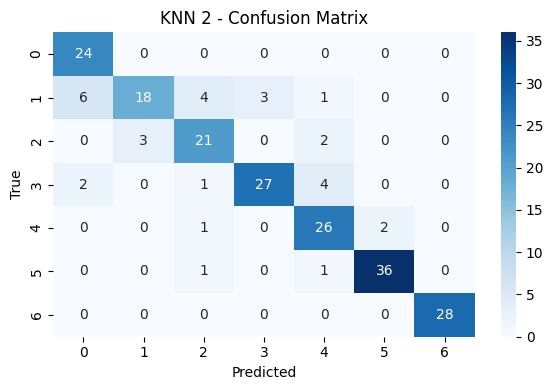

Evaluation for Logistic Regression:
Accuracy: 0.8815, Precision: 0.8802, Recall: 0.8815, F1 Score: 0.8788
Confusion Matrix:
[[24  0  0  0  0  0  0]
 [ 4 26  1  1  0  0  0]
 [ 0  1 22  3  0  0  0]
 [ 0  2  3 25  4  0  0]
 [ 0  0  0  1 23  4  1]
 [ 0  0  0  0  0 38  0]
 [ 0  0  0  0  0  0 28]]



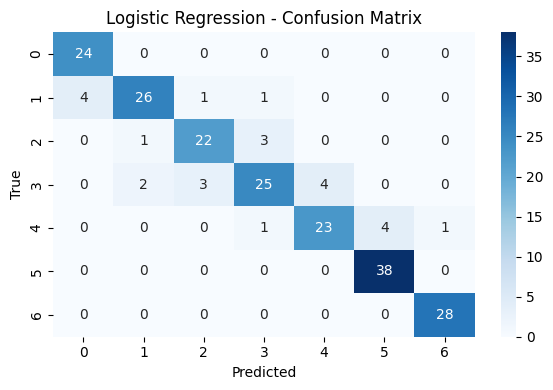

Evaluation for SVM:
Accuracy: 0.9194, Precision: 0.9223, Recall: 0.9194, F1 Score: 0.9188
Confusion Matrix:
[[24  0  0  0  0  0  0]
 [ 1 30  1  0  0  0  0]
 [ 0  2 20  4  0  0  0]
 [ 0  3  0 29  2  0  0]
 [ 0  1  0  0 26  2  0]
 [ 0  1  0  0  0 37  0]
 [ 0  0  0  0  0  0 28]]



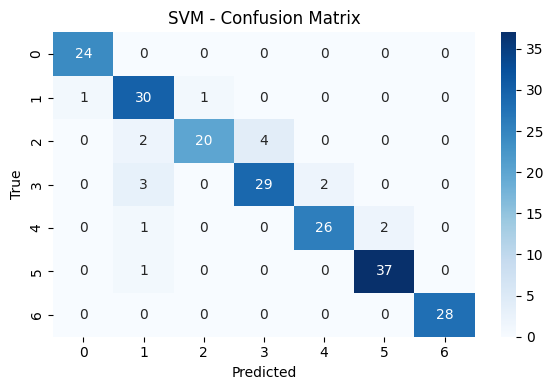

Evaluation for Random Forest 1:
Accuracy: 0.9668, Precision: 0.9710, Recall: 0.9668, F1 Score: 0.9673
Confusion Matrix:
[[24  0  0  0  0  0  0]
 [ 0 32  0  0  0  0  0]
 [ 0  3 23  0  0  0  0]
 [ 0  3  0 31  0  0  0]
 [ 0  0  0  1 28  0  0]
 [ 0  0  0  0  0 38  0]
 [ 0  0  0  0  0  0 28]]



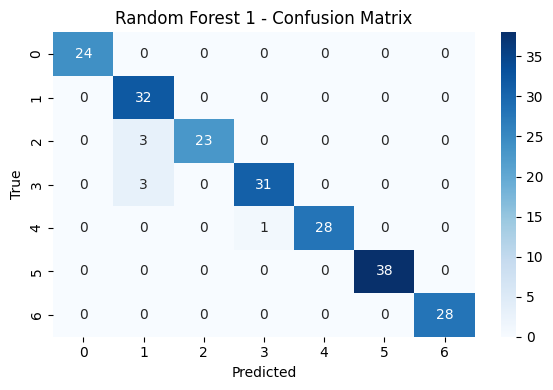

Evaluation for Random Forest 2:
Accuracy: 0.9526, Precision: 0.9557, Recall: 0.9526, F1 Score: 0.9527
Confusion Matrix:
[[24  0  0  0  0  0  0]
 [ 0 31  1  0  0  0  0]
 [ 0  3 23  0  0  0  0]
 [ 0  3  0 29  2  0  0]
 [ 0  0  0  1 28  0  0]
 [ 0  0  0  0  0 38  0]
 [ 0  0  0  0  0  0 28]]



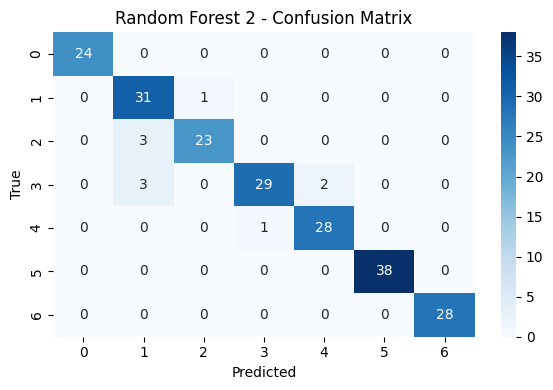

In [ ]:
# After training and testing models, ensure the correct evaluation
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    # Evaluate using metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)

    print(f"Evaluation for {name}:")
    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")
    print(f"Confusion Matrix:\n{cm}\n")

    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.tight_layout()
    plt.show()


    # to interpret confusion matrix  (discussion)

    #'Insufficient_Weight': 0,
    #'Normal_Weight': 1,
    #'Overweight_Level_I': 2,
    #'Overweight_Level_II': 3,
    #'Obesity_Type_I': 4,
    #'Obesity_Type_II': 5,
    #'Obesity_Type_III': 6


In [ ]:

# Predict using the trained model
predictions = best_model.predict(X_test_scaled)

# Output predictions
print("Predictions on new data:", predictions)



Predictions on new data: [3 4 1 5 5 3 2 1 5 6 3 5 3 3 1 3 1 5 1 0 2 4 2 5 4 6 5 1 5 4 4 4 5 1 0 4 5
 6 4 5 4 6 5 5 2 6 3 6 2 4 0 2 3 5 1 2 3 0 1 3 0 1 2 1 5 6 6 5 1 1 1 2 5 5
 4 6 6 6 5 0 3 6 5 2 5 3 1 1 1 4 5 6 3 6 0 0 3 5 3 1 5 0 6 4 3 3 4 0 2 6 3
 4 3 5 6 4 2 3 6 5 3 5 1 2 1 0 2 1 5 0 6 2 4 5 4 3 1 4 2 3 2 3 3 6 1 2 6 6
 0 0 4 6 4 0 5 0 5 4 1 0 3 2 6 2 1 1 1 6 5 0 0 1 2 0 1 1 1 3 3 4 0 3 5 1 5
 2 2 0 0 6 5 3 0 4 5 3 3 4 4 1 1 6 1 4 1 1 6 1 5 5 4]


# EDA


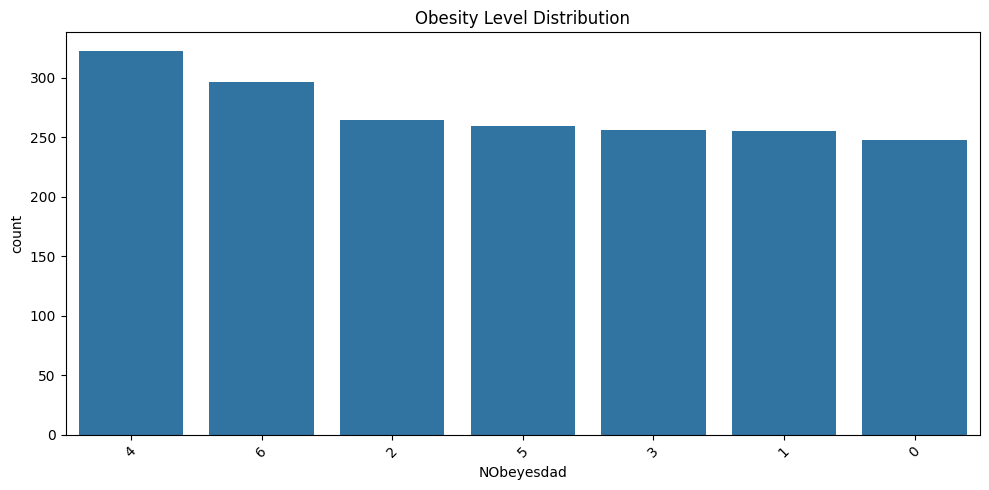

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.countplot(data=train, x='NObeyesdad', order=train['NObeyesdad'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Obesity Level Distribution")
plt.tight_layout()
plt.show()


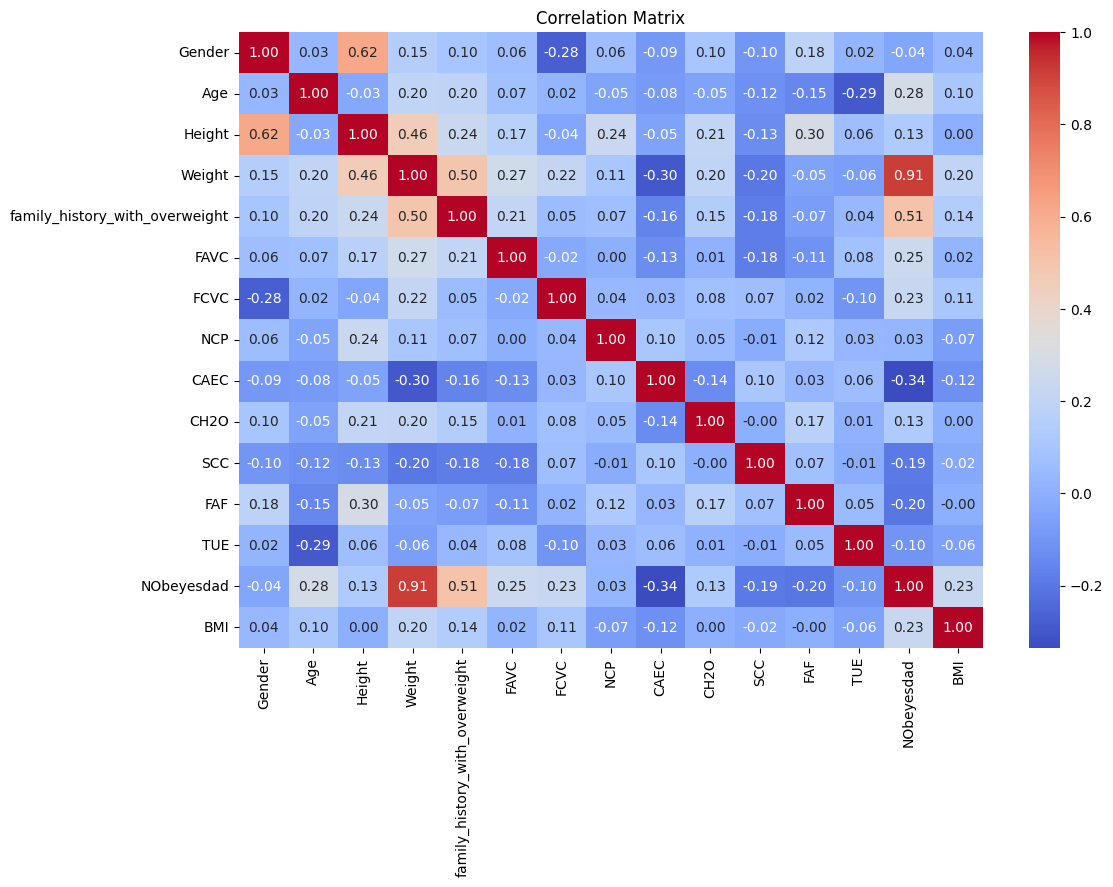

In [ ]:
plt.figure(figsize=(12, 8))
corr = train.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler
numeric_features = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']  # example list


scaler = StandardScaler()
train[numeric_features] = scaler.fit_transform(train[numeric_features])

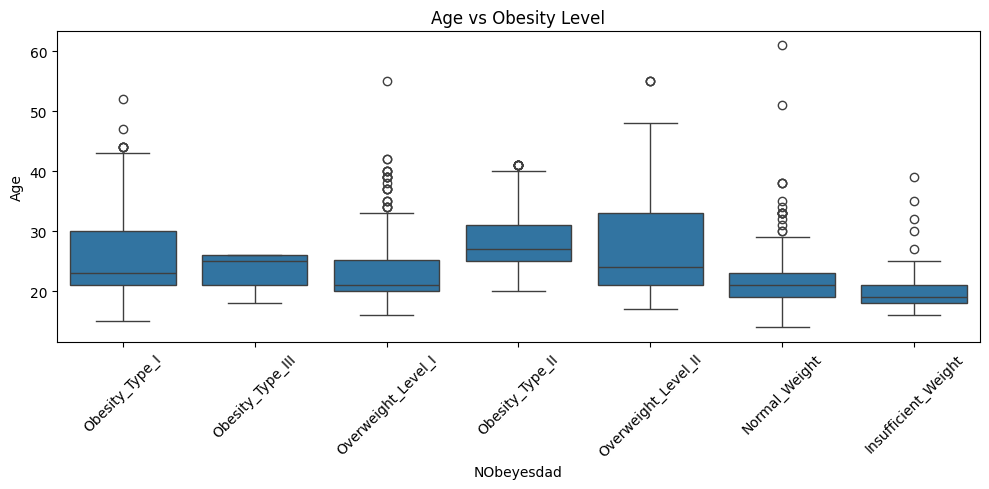

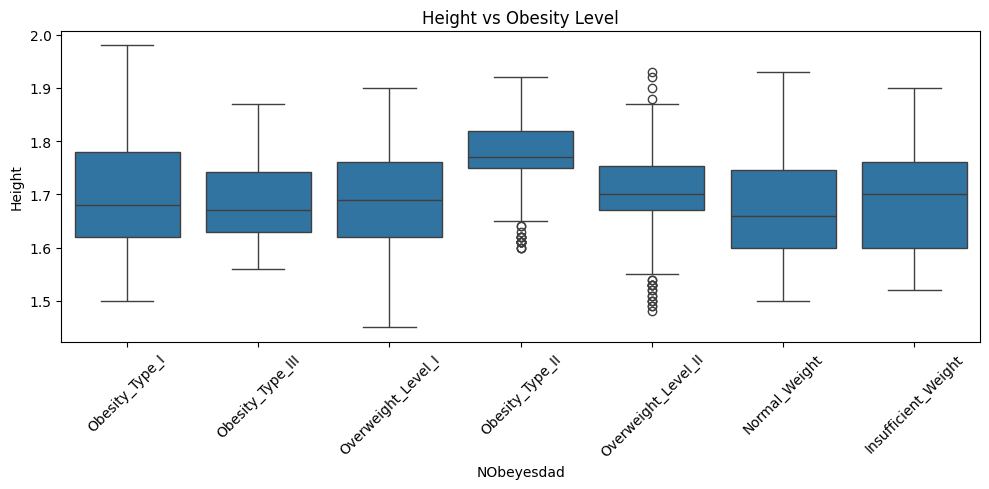

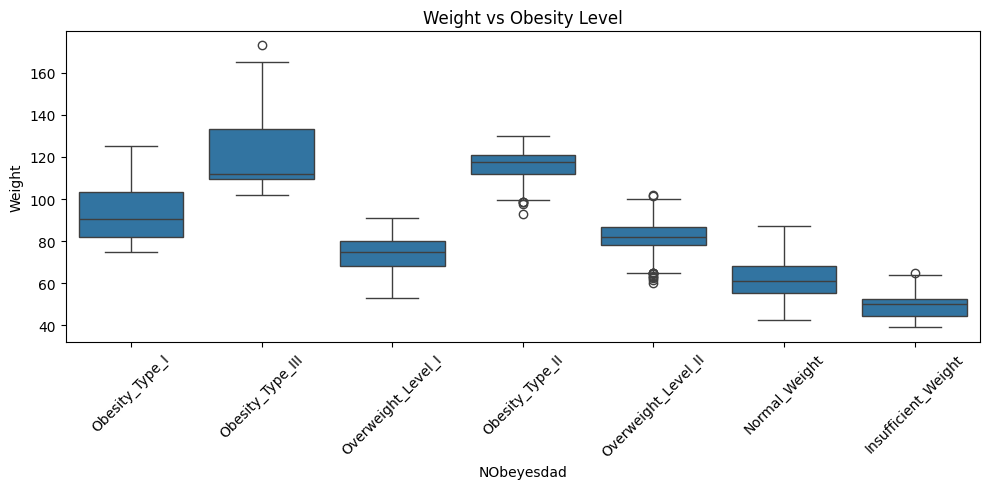

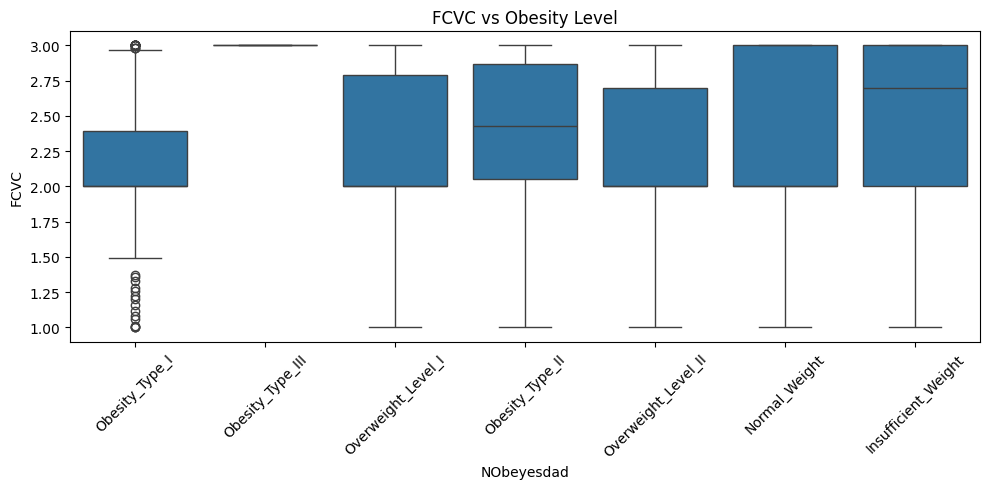

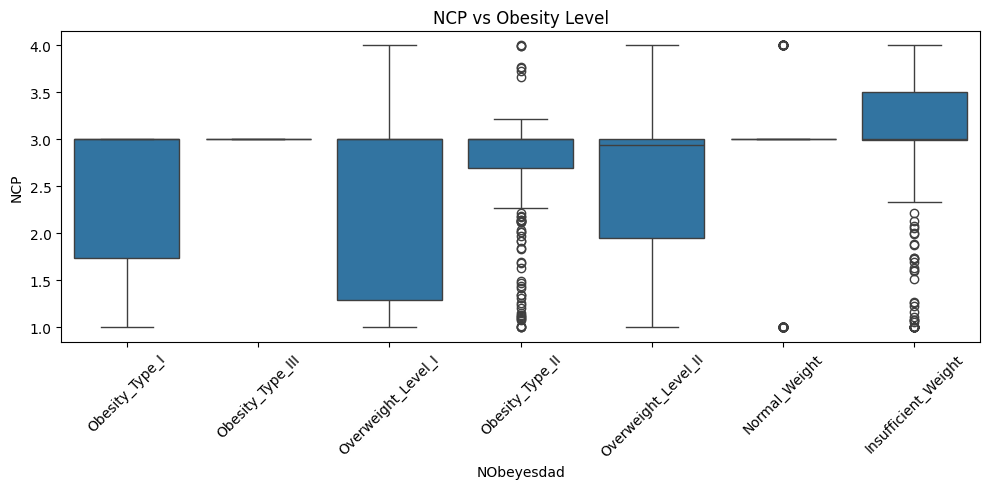

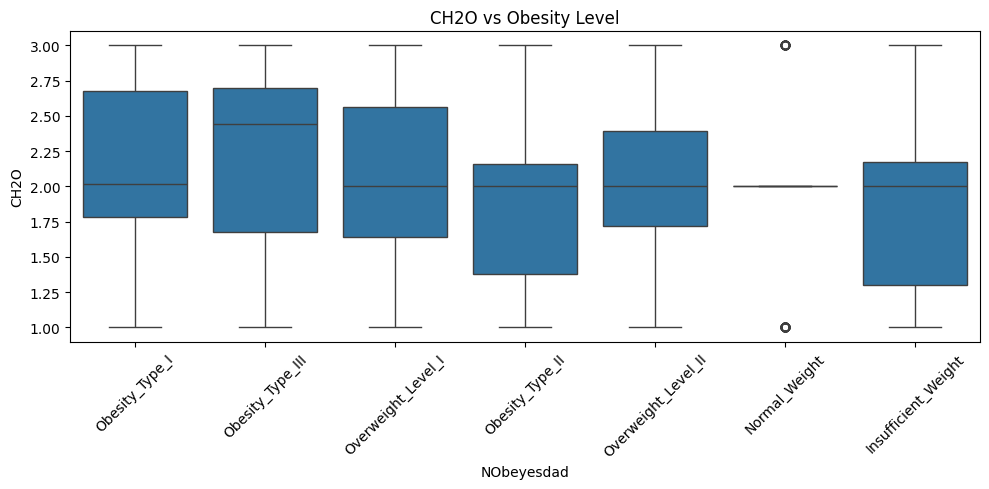

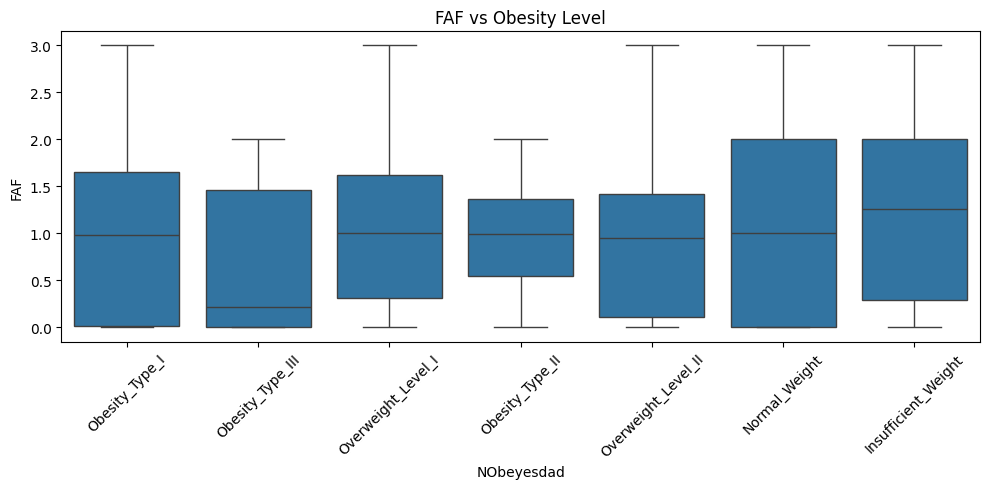

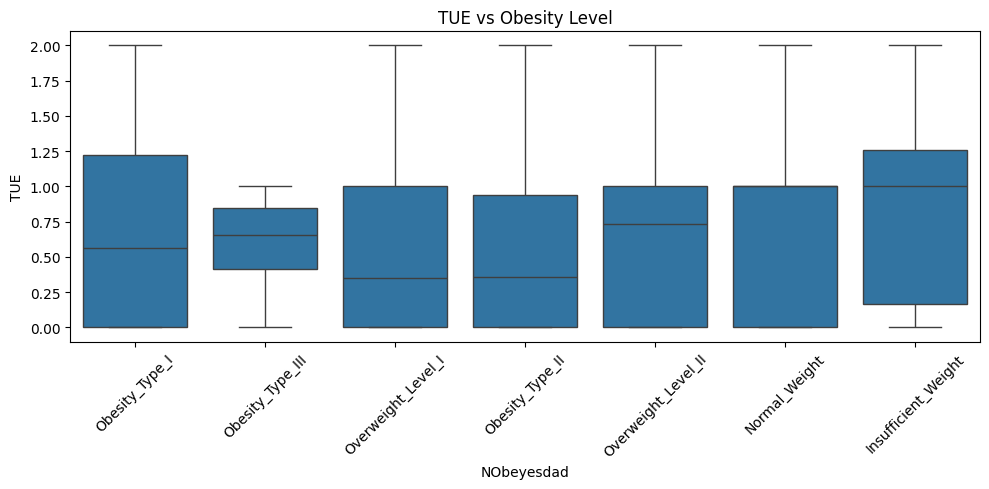

In [ ]:
# Keep a copy of original data
train_raw = pd.read_csv("train_dataset.csv")  # or use your unprocessed DataFrame

# Use raw data only for EDA
for feature in numeric_features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='NObeyesdad', y=feature, data=train_raw, order=train_raw['NObeyesdad'].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f'{feature} vs Obesity Level')
    plt.tight_layout()
    plt.show()


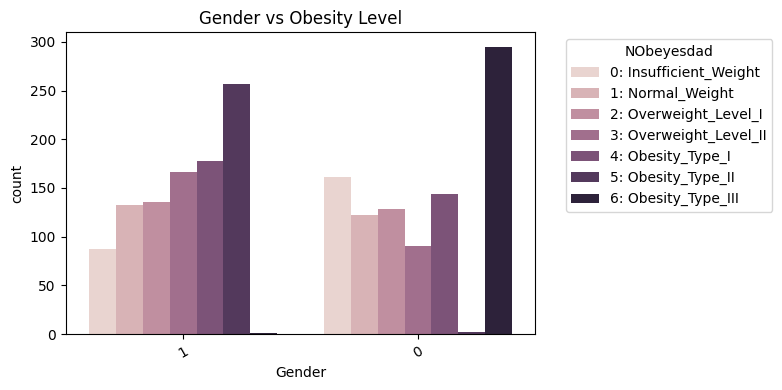

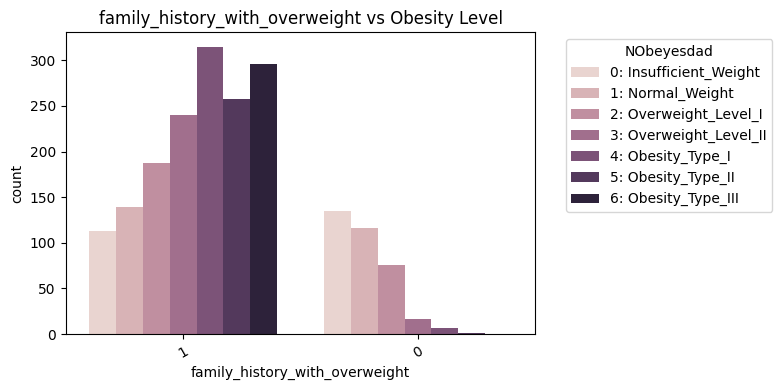

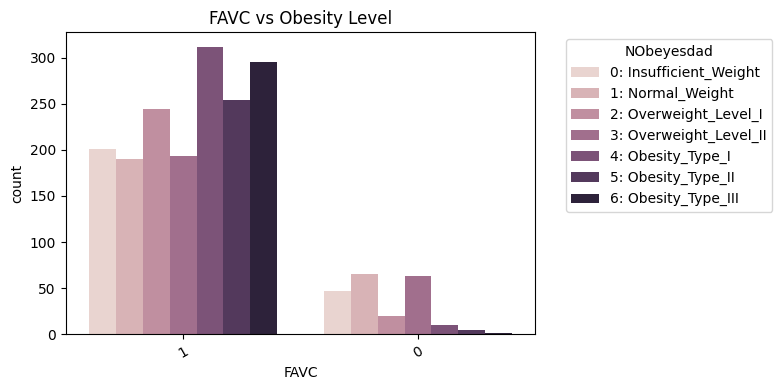

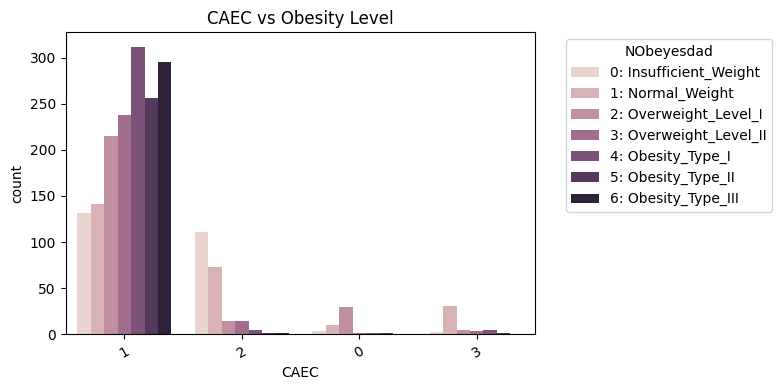

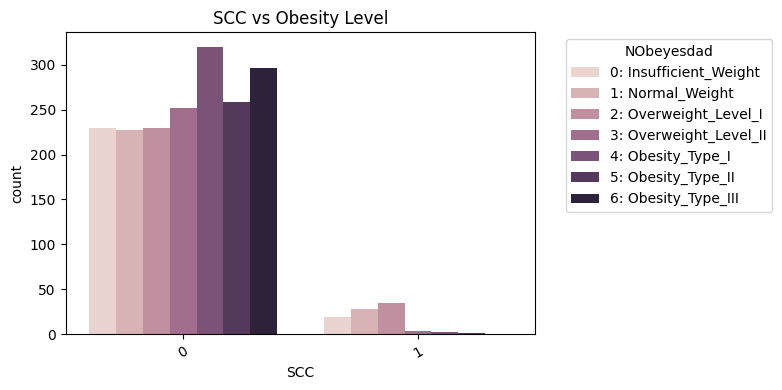

In [ ]:
import matplotlib.patches as mpatches

# Reverse mapping: number -> label
reverse_ordinal_mapping = {v: k for k, v in ordinal_mapping.items()}

# Columns that exist
categorical_features = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']

existing_categorical = [col for col in categorical_features if col in train.columns]

for col in existing_categorical:
    plt.figure(figsize=(8, 4))
    ax = sns.countplot(data=train, x=col, hue='NObeyesdad', order=train[col].value_counts().index)

    # Format the legend labels using the reverse mapping
    handles, labels = ax.get_legend_handles_labels()
    new_labels = [f"{label}: {reverse_ordinal_mapping[int(label)]}" for label in labels]
    ax.legend(handles, new_labels, bbox_to_anchor=(1.05, 1), loc='upper left', title='NObeyesdad')

    plt.xticks(rotation=30)
    plt.title(f'{col} vs Obesity Level')
    plt.tight_layout()
    plt.show()


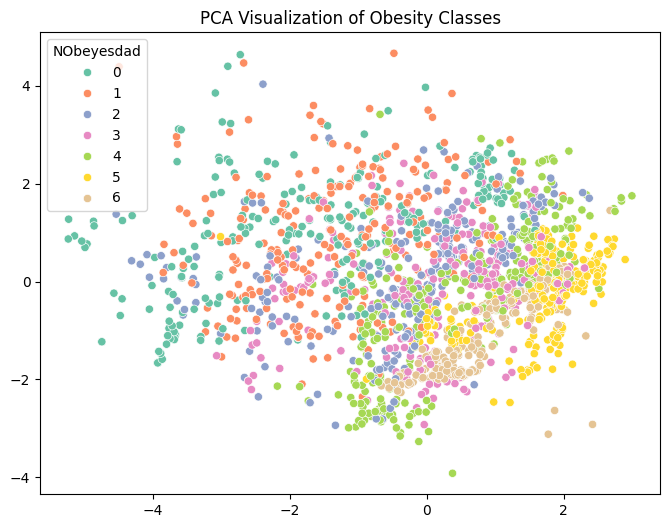

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = train.drop('NObeyesdad', axis=1)
y = train['NObeyesdad']
X_scaled = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y, palette='Set2')
plt.title("PCA Visualization of Obesity Classes")
plt.show()


In [ ]:
import joblib
joblib.dump(best_model, 'obesity_model.pkl')  # Save the trained model


['obesity_model.pkl']

In [ ]:
import joblib
from sklearn.preprocessing import StandardScaler

# After you've created your train-test split
X_train = train.drop("NObeyesdad", axis=1)
y_train = train["NObeyesdad"]
X_test = test.drop("NObeyesdad", axis=1)
y_test = test["NObeyesdad"]

# Create and fit the scaler on the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

joblib.dump(scaler, 'obesity_scaler.pkl')  # This is the key addition



['obesity_scaler.pkl']

In [ ]:
examples = [
    {"Gender": "Male", "Age": 35, "Height": 1.71, "Weight": 84.72, "family_history_with_overweight": "yes",
     "FAVC": "yes", "FCVC": 2.88, "NCP": 3, "CAEC": "Sometimes", "SMOKE": "no", "CH2O": 3, "SCC": "no",
     "FAF": 2, "TUE": 0.832, "CALC": "Sometimes", "MTRANS": "Automobile", "NObeyesdad": "Overweight_Level_II"},
    {"Gender": "Male", "Age": 19, "Height": 1.75, "Weight": 100, "family_history_with_overweight": "yes",
     "FAVC": "yes", "FCVC": 2, "NCP": 3, "CAEC": "Frequently", "SMOKE": "no", "CH2O": 2, "SCC": "no",
     "FAF": 2, "TUE": 0, "CALC": "Sometimes", "MTRANS": "Public_Transportation", "NObeyesdad": "Obesity_Type_I"},
    {"Gender": "Male", "Age": 19, "Height": 1.85, "Weight": 65, "family_history_with_overweight": "yes",
     "FAVC": "no", "FCVC": 2, "NCP": 3, "CAEC": "Sometimes", "SMOKE": "no", "CH2O": 3, "SCC": "no",
     "FAF": 2, "TUE": 1, "CALC": "Sometimes", "MTRANS": "Bike", "NObeyesdad": "Normal_Weight"},
    {"Gender": "Male", "Age": 31, "Height": 1.78, "Weight": 120.64, "family_history_with_overweight": "yes",
     "FAVC": "yes", "FCVC": 2.5, "NCP": 3, "CAEC": "Sometimes", "SMOKE": "no", "CH2O": 2.04, "SCC": "no",
     "FAF": 0.84, "TUE": 0.49, "CALC": "Sometimes", "MTRANS": "Automobile", "NObeyesdad": "Obesity_Type_II"},
    {"Gender": "Female", "Age": 21, "Height": 1.66, "Weight": 57, "family_history_with_overweight": "yes",
     "FAVC": "yes", "FCVC": 2, "NCP": 3, "CAEC": "Frequently", "SMOKE": "no", "CH2O": 1, "SCC": "no",
     "FAF": 1, "TUE": 1, "CALC": "Sometimes", "MTRANS": "Public_Transportation", "NObeyesdad": "Normal_Weight"}
]
gender_map = {"Male": 1, "Female": 0}
yes_no_map = {"yes": 1, "no": 0}
caec_map = {"Never": 0, "Sometimes": 1, "Frequently": 2, "Always": 3}
calc_map = {"Never": 0, "Sometimes": 1, "Frequently": 2, "Always": 3}
mtrans_map = {"Automobile": 0, "Bike": 1, "Motorbike": 2, "Public_Transportation": 3, "Walking": 4}


ordinal_mapping = {
    'Insufficient_Weight': 0,
    'Normal_Weight': 1,
    'Overweight_Level_I': 2,
    'Overweight_Level_II': 3,
    'Obesity_Type_I': 4,
    'Obesity_Type_II': 5,
    'Obesity_Type_III': 6
}
reverse_mapping = {v: k for k, v in ordinal_mapping.items()}


def train_model_from_examples():
    try:
        print("\n===== TRAINING SIMPLE MODEL FROM EXAMPLES =====")
        # Extract examples
        X = []
        y = []

        for example in examples:
            # Create feature vector
            gender = gender_map[example['Gender']]
            age = float(example['Age'])
            height = float(example['Height'])
            weight = float(example['Weight'])
            bmi = weight / (height ** 2)
            fhwo = yes_no_map[example['family_history_with_overweight']]
            favc = yes_no_map[example['FAVC']]
            fcvc = float(example['FCVC'])
            ncp = float(example['NCP'])
            caec = caec_map[example['CAEC']]
            ch2o = float(example['CH2O'])
            scc = yes_no_map[example['SCC']]
            faf = float(example['FAF'])
            tue = float(example['TUE'])

            X.append([gender, age, height, weight, fhwo, favc, fcvc, ncp, caec, ch2o, scc, faf, tue, bmi])
            y.append(ordinal_mapping[example['NObeyesdad']])

        X = np.array(X)
        y = np.array(y)

        # Train a simple Random Forest model
        from sklearn.ensemble import RandomForestClassifier
        from sklearn.tree import DecisionTreeClassifier
        from sklearn.ensemble import VotingClassifier


        # Create and fit scaler
        global scaler
        scaler = StandardScaler()
        scaler.fit(X)

        # Train several simple models and combine them
        rf = RandomForestClassifier(n_estimators=10, random_state=42)
        dt = DecisionTreeClassifier(max_depth=5, random_state=42)

        # Create a voting classifier
        global model
        model = VotingClassifier(estimators=[
            ('rf', rf),
            ('dt', dt)
        ], voting='hard')

        # Fit the model
        model.fit(X, y)

        joblib.dump(scaler, 'obesity_scaler.pkl')

        print("Simple model trained and saved!")
        print(f"Features shape: {X.shape}")
        print(f"Target shape: {y.shape}")

        # Test prediction on the examples
        print("\nTesting prediction on examples:")
        for i, x in enumerate(X):
            pred = model.predict(x.reshape(1, -1))[0]
            expected = y[i]
            pred_label = reverse_mapping[pred]
            expected_label = reverse_mapping[expected]
            match = "✓" if pred == expected else "✗"
            print(f"Example {i+1}: Predicted {pred_label}, Expected {expected_label} {match}")


    except Exception as e:
        print(f"Error training model: {str(e)}")
        import traceback
        print(traceback.format_exc())


train_model_from_examples()


===== TRAINING SIMPLE MODEL FROM EXAMPLES =====
Simple model trained and saved!
Features shape: (5, 14)
Target shape: (5,)

Testing prediction on examples:
Example 1: Predicted Overweight_Level_II, Expected Overweight_Level_II ✓
Example 2: Predicted Obesity_Type_I, Expected Obesity_Type_I ✓
Example 3: Predicted Normal_Weight, Expected Normal_Weight ✓
Example 4: Predicted Obesity_Type_II, Expected Obesity_Type_II ✓
Example 5: Predicted Normal_Weight, Expected Normal_Weight ✓
